# Question 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from madelbrot import get_div, get_iter

In [2]:

def plotter(n, thresh, max_steps=25, getter=get_div):
    mx = 2.48 / (n-1)
    my = 2.26 / (n-1)
    mapper = lambda x,y: (mx*x - 2, my*y - 2)
    img=np.full((n,n), 255)
    for x in range(n):
        for y in range(n):
            x_, y_ = mapper(x,y)
            if -2<x_<2 and -2<y_<2:
                it = getter(complex(*mapper(x,y)), thresh=thresh, max_steps=max_steps)
                img[y][x] = 255 - it
    return img

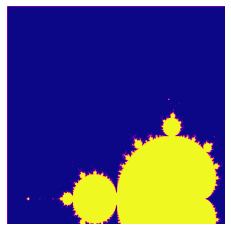

In [3]:
n=1000
img = plotter(n, thresh=4, max_steps=50, getter=get_div)
fig, ax = plt.subplots(1,1)
ax.imshow(img, cmap="plasma")
ax.axis("off")
fig.savefig("mandelbrot1.png")

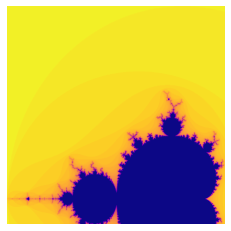

In [4]:
n=1000
img = plotter(n, thresh=4, max_steps=50, getter=get_iter)
fig, ax = plt.subplots(1,1)
ax.imshow(img, cmap="plasma")
ax.axis("off")
fig.savefig("mandelbrot2.png")

# Question 2

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp

## Question 2.1

In [6]:
def XDot(X, Y, sig):
    """
    The derivative of X variable where X is proportional to the intensity of convective motion.

    Parameters
    ----------
    X : float
        The value of the X variable
    Y : float
        The value of the Y variable
    sig : float
        The value of sigma i.e Prandtl number which is the ratio of the kinematic viscosity to the
        thermal diffusivity
    
    Returns
    -------
    float or None
        A floating point number of the derivative of X with respect of time.
    """
    return -sig*(X-Y)

def YDot(X, Y, Z, r):
    """
    The derivative of Y variable where Y is proportional to the temperature difference between ascending and decending currents.

    Parameters
    ----------
    X : float
        The value of the X variable
    Y : float
        The value of the Y variable
    Z : float
        The value of the Z variable
    r : float
        The Rayleigh number r which depends on the vertical temperature difference between
        the top and bottom of the atmosphere.
    
    Returns
    -------
    float or None
        A floating point number of the derivative of Y with respect of time.
    """
    return r*X - Y - X*Z

def ZDot(X, Y, Z, b):
    """
    The derivative of Z variable where Z is proportional to the distortion of the verticle temperature profile from linearity.

    Parameters
    ----------
    X : float
        The value of the X variable
    Y : float
        The value of the Y variable
    Z : float
        The value of the Z variable
    b : float
        The  value b which is a dimensionless length scale
    
    Returns
    -------
    float or None
        A floating point number of the derivative of Z with respect of time.
    """
    return -b*Z + X*Y

def WDot(t, W, sig, r, b):
    """
    The derivative of W variable where W is the vector W = (X, Y, Z).

    Parameters
    ----------
    t : float
        The time variable
    W : float
        The current value of W = (X,Y,Z)
    sig : float
        The value of sigma i.e Prandtl number which is the ratio of the kinematic viscosity to the
        thermal diffusivity
    r : float
        The Rayleigh number r which depends on the vertical temperature difference between
        the top and bottom of the atmosphere.
    b : float
        The  value b which is a dimensionless length scale
    
    Returns
    -------
    list
        A list floating point number which repersents the derivative of X,Y,Z with respect of time.
    """
    X, Y, Z = W
    return [XDot(X, Y, sig), YDot(X, Y, Z, r), ZDot(X, Y, Z, b)]

## Question 2.2

In [7]:
W0 = [0., 1., 0.]
init = [10., 28., 8/3] # [sigma, r b]

t_final = 60
sol = solve_ivp(WDot, t_span = [0, t_final], y0 = W0, args = init, dense_output = True)

## Question 2.3

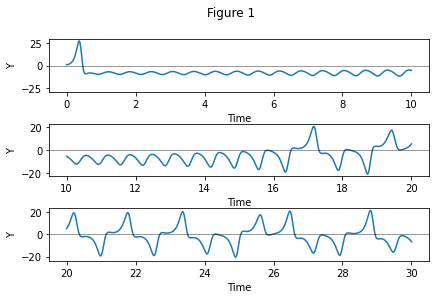

In [8]:
N = int(1e6)
fig, axs = plt.subplots(3,1)
fig.suptitle("Figure 1")
fig.tight_layout()
for i in range(3):
    t_arr = np.linspace(i*10, (i+1)*10, N)
    W = sol.sol(t_arr)
    X, Y, Z = W
    axs[i].plot(t_arr, Y)
    axs[i].axhline(y = 0, color = 'black', linewidth = 0.8, alpha = 0.5)
    yabs_max = abs(max(axs[i].get_ylim(), key=abs))
    axs[i].set_ylim(ymin=-yabs_max, ymax=yabs_max)
    axs[i].set_xlabel("Time")
    axs[i].set_ylabel("Y")

## Question 2.4

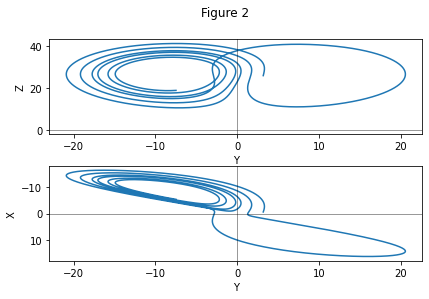

In [9]:
t_arr = np.linspace(14, 19, N)
W = sol.sol(t_arr)
X, Y, Z = W

fig, axs = plt.subplots(2,1)
fig.suptitle("Figure 2")
fig.tight_layout()

axs[0].plot(Y, Z)
axs[0].axhline(y = 0, color = 'black', linewidth = 0.8, alpha = 0.5)
axs[0].axvline(x = 0, color = 'black', linewidth = 0.8, alpha = 0.5)
axs[0].set_xlabel("Y")
axs[0].set_ylabel("Z")

axs[1].plot(Y, X)
axs[1].axhline(y = 0, color = 'black', linewidth = 0.8, alpha = 0.5)
axs[1].axvline(x = 0, color = 'black', linewidth = 0.8, alpha = 0.5)
axs[1].set_xlabel("Y")
axs[1].set_ylabel("X")
axs[1].invert_yaxis()

## Question 2.5

Text(0.5, 0, 'Time')

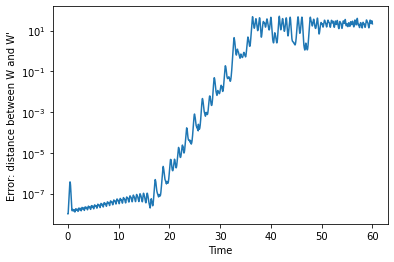

In [10]:
W_prime = np.array([0., 1., 0.]) + np.array([0, 1e-8, 0])
init = [10., 28., 8/3] # [sigma, r b]
t_final = 60
sol2 = solve_ivp(WDot, t_span = [0, t_final], y0 = W_prime, args = init, dense_output = True)

N = int(1e6)
t_arr = np.linspace(0, 60, N)
W = sol.sol(t_arr)
W2 = sol2.sol(t_arr)

# plot of the individual errors for X, Y, Z
# fig, axs = plt.subplots(3,1)

# for i in range(3):
#     axs[i].plot(t_arr, np.abs(W[i]-W2[i]))
#     axs[i].set_yscale("log")

X, Y, Z = W
X2, Y2, Z2 = W2
plt.figure()
plt.plot(t_arr, np.sqrt((X2-X)**2 + (Y2-Y)**2 + (Z2-Z)**2))
plt.yscale("log")
plt.ylabel("Error: distance between W and W'")
plt.xlabel("Time")